# Final Project
INFO 202 -- Information Organization and Retrieval (Fall 2022)

Andy Vo

---

## About the Project
hello

## How It Works
okay

## Inspiration
hi

## Goals and Future Directions
hey

## Kaggle Dataset
https://www.kaggle.com/datasets/ayhmrba/elon-musk-tweets-2010-2021?select=2020.csv


resources:

- https://www.visualcapitalist.com/a-decade-of-elon-musks-tweets-visualized/
- https://www.nltk.org/howto.html

help:
- https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c
- https://necromuralist.github.io/Neurotic-Networking/posts/nlp/01-twitter-preprocessing-with-nltk/
- https://medium.com/red-buffer/twitter-sentiment-analysis-using-sklearn-and-nltk-3bd79521141a
- https://aniekan.blog/2020/09/07/how-to-use-nlp-to-classify-tweets/
- https://medium.com/geekculture/how-to-label-unlabeled-tweets-fb701b97ebf
- https://medium.com/web-mining-is688-spring-2021/ranking-twitter-contents-based-on-cosine-similarity-and-tf-idf-weights-and-pca-d1186eb5c41
- https://medium.com/vickdata/detecting-hate-speech-in-tweets-natural-language-processing-in-python-for-beginners-4e591952223
- https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7

future:
- https://towardsdatascience.com/text-classification-using-word-embeddings-and-deep-learning-in-python-classifying-tweets-from-6fe644fcfc81


In [ ]:
# imports for the project

### data analysis ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### data preprocessing and feature engineering ###
import re
import collections
import nltk
from nltk.corpus import stopwords

### sentiment analysis and visuals ###
nltk.download('vader_lexicon')
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### export our data ###
import json

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# mount google drive to read csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


talk about the csv files

In [ ]:
# reading our csv files onto variables
df2010 = pd.read_csv('/content/drive/My Drive/info 202/data/2010.csv')
df2011 = pd.read_csv('/content/drive/My Drive/info 202/data/2011.csv')
df2012 = pd.read_csv('/content/drive/My Drive/info 202/data/2012.csv')
df2013 = pd.read_csv('/content/drive/My Drive/info 202/data/2013.csv')
df2014 = pd.read_csv('/content/drive/My Drive/info 202/data/2014.csv')
df2015 = pd.read_csv('/content/drive/My Drive/info 202/data/2015.csv')
df2016 = pd.read_csv('/content/drive/My Drive/info 202/data/2016.csv')
df2017 = pd.read_csv('/content/drive/My Drive/info 202/data/2017.csv')
df2018 = pd.read_csv('/content/drive/My Drive/info 202/data/2018.csv')
df2019 = pd.read_csv('/content/drive/My Drive/info 202/data/2019.csv')
df2020 = pd.read_csv('/content/drive/My Drive/info 202/data/2020.csv')
df2021 = pd.read_csv('/content/drive/My Drive/info 202/data/2021.csv')
df2022 = pd.read_csv('/content/drive/My Drive/info 202/data/2022.csv')

## Column Descriptions
`#:` Index.

`id:` ID of tweet.

`conversation_id:` ID of twitter conversation/thread.

`created_at:` Unknown, some kind of time/location index from twitter. (?)

`date:` Date of Creation.

`timezone:` Timezone.

`place:` Location.

`tweet:` Contents of tweet, tweet body.

`language:` Language of tweet.

`hashtags:` Hashtags in the tweet "#".

`cashtags:` Cashtags in the tweet "$", often used for stock tweets.

`user_id:` ID of the tweet/reply author.

`user_id_str:` User ID but in string format.

`username:` Username of the tweet/reply author.

`name:` Name of tweet/reply author.

`day:` Day of the week in which the tweet was published.

`hour:` Hour of the day in which the tweet was published.

`link:` Link to the tweet.

`urls:` Urls present in the tweet.

`photos:` Photos in the tweet (as links).

`video:` videos in the tweet (Yes/No).

`thumbnail:` Thumbnail for the image present in the tweet (if applicable, otherwise null).

`retweet:` Is this a retweet? (Yes/No).

`nlikes:` Number of likes on the tweet.

`nreplies:` Number of replies to the tweet.

`nretweets:` Number of times the tweet was retweeted.

`quote_url:` Url of quoted tweet, if applicable.

`search:` Unknown.

`near:` Additional location info, null.

`geo:` Additional location info, null.

`source:` Unknown, null.

`user_rt_id:` Possibly the id of the tweet author if it's a retweet, null.
user_rt: Possibly the username of the tweet author if it's a retweet, null.

`retweet_id:` Id of the retweet, null.

`reply_to:` Info about the original tweet if this datapoint is a reply.

`retweet_date:` Date of retweet, null.

`translate`, `trans_src`, `trans_dest` Are columns that have to do with the google translate api, which was not used, therefore these columns are all null.

talk about concat

In [ ]:
# we have a lot of csv files to work with
# let's concatenate them all together
tweet_df = pd.concat([df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022], ignore_index=True)
tweet_df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34873,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
34874,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
34875,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
34876,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


talk about dropping cols

In [ ]:
# there are a lot of columns that we don't need
# list(tweet_df.columns)
tweet_df = tweet_df.drop(['Unnamed: 0','id','conversation_id','created_at','timezone','place','language','user_id','user_id_str','username','name','day','hour','link','urls','photos','video','thumbnail','retweet','quote_url','search','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest'], axis=1)
list(tweet_df.columns) # should be 15 columns

['date',
 'tweet',
 'hashtags',
 'cashtags',
 'nlikes',
 'nreplies',
 'nretweets',
 'reply_to',
 'time',
 'mentions',
 'replies_count',
 'retweets_count',
 'likes_count']

talk about seeing results above with new columns

talk about cleaning data

In [ ]:
# move the replies_count, retweets_count, and likes_count to nreplies, nretweets, and nlikes respectively

# tweet_df['likes_count'].isnull().values.sum()
# print(len(df2021.index)+len(df2022.index))
# print(34878-30735)
tweet_df['nlikes'] = tweet_df['nlikes'].fillna(0)
tweet_df['nreplies'] = tweet_df['nreplies'].fillna(0)
tweet_df['nretweets'] = tweet_df['nretweets'].fillna(0)
tweet_df['likes_count'] = tweet_df['likes_count'].fillna(0)
tweet_df['replies_count'] = tweet_df['replies_count'].fillna(0)
tweet_df['retweets_count'] = tweet_df['retweets_count'].fillna(0)

tweet_df['num_likes'] = tweet_df['nlikes'] + tweet_df['likes_count']
tweet_df['num_replies'] = tweet_df['nreplies'] + tweet_df['replies_count']
tweet_df['num_retweets'] = tweet_df['nretweets'] + tweet_df['retweets_count']

tweet_df = tweet_df.drop(['nlikes','nreplies','nretweets','likes_count','replies_count','retweets_count'], axis=1)
tweet_df

,date,tweet,hashtags,cashtags,reply_to,time,mentions,num_likes,num_replies,num_retweets
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",[],[],[],NaN,NaN,4652.0,391.0,348.0
1,2011-12-28 22:27:08,@TheOnion So true :),[],[],[],NaN,NaN,12.0,7.0,1.0
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...,[],[],[],NaN,NaN,39.0,13.0,34.0
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...,[],[],[],NaN,NaN,155.0,9.0,18.0
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki...",[],[],[],NaN,NaN,158.0,15.0,13.0
...,...,...,...,...,...,...,...,...,...,...
34873,2022-01-03,https://t.co/LA9hPzVlGx,[],[],[],02:56:00,[],473530.0,25611.0,51383.0
34874,2022-01-02,Let’s make the roaring 20’s happen!,[],[],[],22:19:33,[],320201.0,22500.0,26951.0
34875,2022-01-02,Great work by Tesla team worldwide!,[],[],[],21:56:50,[],66405.0,5630.0,4459.0
34876,2022-01-01,@BLKMDL3 @Tesla 🔥,[],[],"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",05:58:52,[],45704.0,1074.0,472.0


talk about seeing results above with the new columns

talk about clean_tweet and regex

resources:
- https://medium.com/vickdata/detecting-hate-speech-in-tweets-natural-language-processing-in-python-for-beginners-4e591952223
- https://docs.python.org/3/library/re.html


In [ ]:
# let's use the re library to clean up tweets by using regex matching

def clean_tweet(df, tweet_col, new_col):
  """
  df: pandas dataframe being worked on
  tweet_col: column with tweets
  new_col: column where cleaned tweets will go to
  ---
  clean_tweet takes in a column of raw tweets from a df, turns it lowercase,
  and applies a regex matching operation (this assumes we count capitalized
  versions of a word as the same -- Apple and apple)
  ---
  returns df
  """
  df[new_col] = df[tweet_col].str.lower()
  df[new_col] = df[new_col].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
  
  return df

clean_df = clean_tweet(tweet_df, "tweet", "clean_tweet")
clean_df

,date,tweet,hashtags,cashtags,reply_to,time,mentions,num_likes,num_replies,num_retweets,clean_tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",[],[],[],NaN,NaN,4652.0,391.0,348.0,please ignore prior tweets as that was someone...
1,2011-12-28 22:27:08,@TheOnion So true :),[],[],[],NaN,NaN,12.0,7.0,1.0,so true
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...,[],[],[],NaN,NaN,39.0,13.0,34.0,if you ever wanted to know the real truth abou...
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...,[],[],[],NaN,NaN,155.0,9.0,18.0,walked around a neighborhood recently rebuilt ...
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki...",[],[],[],NaN,NaN,158.0,15.0,13.0,it was xmas so we brought presents for the kid...
...,...,...,...,...,...,...,...,...,...,...,...
34873,2022-01-03,https://t.co/LA9hPzVlGx,[],[],[],02:56:00,[],473530.0,25611.0,51383.0,
34874,2022-01-02,Let’s make the roaring 20’s happen!,[],[],[],22:19:33,[],320201.0,22500.0,26951.0,lets make the roaring 20s happen
34875,2022-01-02,Great work by Tesla team worldwide!,[],[],[],21:56:50,[],66405.0,5630.0,4459.0,great work by tesla team worldwide
34876,2022-01-01,@BLKMDL3 @Tesla 🔥,[],[],"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",05:58:52,[],45704.0,1074.0,472.0,


talk about seeing results above

talk about nltk and collections to get top words said in tweets

resources:
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text


In [ ]:
# operate on a list of those newly cleaned tweets
tweets_list = clean_df['clean_tweet'].values.tolist()
# tweets_list

# looks like there are a lot of meaningless words
# we can remove stopwords with the nltk package
nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')

# this list is pretty good but we can add a lot more based on a couple runs
# we only want top categories so let's remove sentiments
new_stopwords = ['hes', 'shes', 'youre', 'dont', 'wouldnt', 'didnt', 'amp',
                 'good', 'like', 'yes', 'would', 'great', 'one', 'much',
                 'first', 'also', 'new', 'thanks', 'make', 'need', 'yeah',
                 'true', 'soon', 'right', 'get', 'way', 'even', 'thats', 'us',
                 'actually', 'many', 'coming', 'probably', 'sure', 'exactly',
                 'really', 'next', 'year', 'better', 'maybe', 'im', 'lot',
                 'still', 'best', 'back', 'go', 'long', 'going', 'week',
                 'almost', 'well', 'could', 'know', 'w', 'cool', 'hard',
                 'point', 'big', 'needed', 'day', 'full', 'ok', 'want', 'haha',
                 'made', 'done', 'see', 'today', 'enough', 'cant', 'something']
stop_words.extend(new_stopwords)

# split the tweets into a large list of words
words_list = []
for tweet in tweets_list:
  filtered_tweet = [word for word in tweet.split() if not word in stop_words]
  words_list += filtered_tweet

words_list

# we can use the collections library to count commonly used words
counts_list = collections.Counter(words_list)
counts_list.most_common(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('tesla', 3365),
 ('model', 1557),
 ('car', 1063),
 ('rocket', 1042),
 ('time', 935),
 ('3', 861),
 ('people', 818),
 ('launch', 795),
 ('cars', 751),
 ('high', 710),
 ('spacex', 699),
 ('falcon', 693),
 ('work', 596),
 ('production', 577),
 ('dragon', 547),
 ('space', 544),
 ('team', 529),
 ('mars', 512),
 ('love', 506),
 ('years', 498),
 ('landing', 480),
 ('test', 479),
 ('2', 470),
 ('think', 449),
 ('flight', 437),
 ('software', 409),
 ('super', 394),
 ('future', 386),
 ('solar', 383),
 ('use', 363),
 ('9', 361),
 ('station', 355),
 ('autopilot', 355),
 ('engine', 354),
 ('starship', 353),
 ('power', 351),
 ('working', 344),
 ('design', 340),
 ('x', 338),
 ('earth', 335),
 ('real', 334),
 ('company', 329),
 ('heavy', 321),
 ('air', 314),
 ('drive', 313),
 ('energy', 312),
 ('5', 311),
 ('end', 310),
 ('months', 309),
 ('orbit', 307)]

talk about results above

looks like tesla, spacex and space, software and design, aviation, solar and energy, and workforce

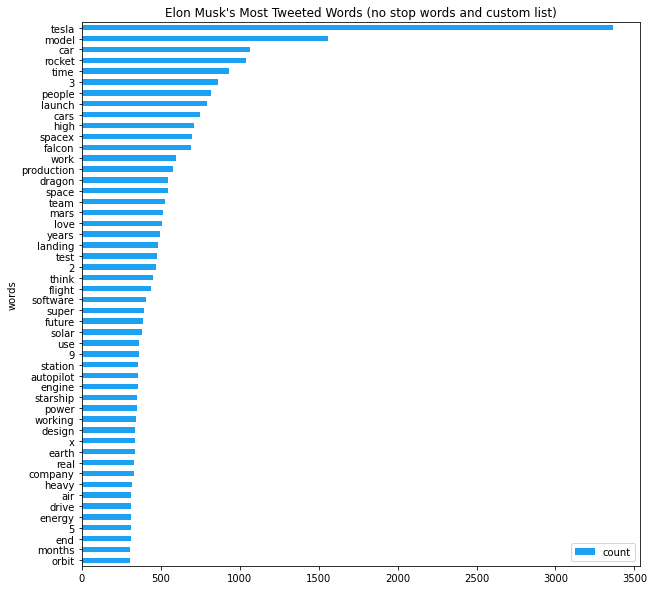

In [ ]:
# turn our word frequency list to a df for plotting
counts_df = pd.DataFrame(counts_list.most_common(50), columns=['words', 'count'])

# create the plt figure
fig, ax = plt.subplots(figsize=(10,10))

# plot horizontal bar graph
counts_df.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color='#1DA1F2')

ax.set_title("Elon Musk's Most Tweeted Words (no stop words and custom list)")

plt.show()

cluster the tweets together first to see what clusters form and how many (make the most sense)

then we can use cluster centers to basically define the categories

-> don't try to predefine the categories 

In [ ]:
fil = open("top_500_elon_musk_words.txt", "w")
for tup in counts_list.most_common(500):
  fil.write(str(tup) + "\n")
fil.close()

im making categories which implies my own bias on this

In [ ]:
tesla_category_words = ['tesla', 'model', 'car', 'software', 'future',
                        'station', 'autopilot', 'engine', 'power', 'drive',
                        'electric', 'speed', 'battery', 'ai', 'range', 'miles',
                        'mission', 'vehicle', 'engineer', 'engineering',
                        'factory', 'supercharger', 'build', 'auto', 'tech',
                        'technology', 'motor', 'driving', 'road', 'selfdriving',
                        'roadster', 'mph', 'seat', 'truck' ,'hyperloop', 'city',
                        'droneship', 'upgrade', 'option', 'computer', 'stock',
                        'market', 'charge', 'wheel', 'traffic', 'mile', 'miles',
                        'machine', 'feature', 'x', 'y', '3', 's']

tesla_category_words2 = ' '.join(tesla_category_words)

space_category_words = ['rocket', 'launch', 'spacex', 'falcon', 'dragon',
                        'mars', 'landing', 'flight', 'software', 'future',
                        'engine', 'starship', 'power', 'orbit', 'thrust',
                        'ship', 'mission', 'booster', 'engineer', 'engineering',
                        'moon', 'build', 'land', 'orbital', 'tech',
                        'technology', 'motor', 'rockets', 'spaceship', 'heat',
                        'force', 'humanity', 'starlink', 'physics', 'computer',
                        'oxygen', 'velocity', 'satellite', 'satellites',
                        'vacuum', 'fuel', 'steel', 'machine', 'online',
                        'feature', 'engineers', 'rockets']

space_category_words2 = ' '.join(space_category_words)

solar_category_words = ['solar', 'future', 'power', 'earth', 'air', 'energy',
                        'electric', 'system', 'world', 'battery', 'mission',
                        'fire', 'gas', 'california', 'water', 'engineer',
                        'engineering', 'factory', 'supercharger', 'build',
                        'climate', 'tech', 'technology', 'motor', 'space',
                        'environment', 'atmosphere', 'habitat', 'season',
                        'land', 'heat', 'humanity', 'human', 'wind',
                        'sustainable', 'sustain', 'sustainability', 'charge',
                        'carbon', 'wheel', 'burn', 'light', 'steel', 'weather',
                        'fuel', 'batteries', 'feature']

solar_category_words2 = ' '.join(solar_category_words)

working_category_words = ['people', 'work', 'production', 'team', 'love',
                          'software', 'test', 'power', 'design', 'company',
                          'change', 'system', 'world', 'speed', 'life',
                          'cost', 'boring', 'make', 'ai', 'safety', 'support',
                          'worth', 'problem', 'public', 'mission', 'california',
                          'pressure', 'mass', 'need', 'money', 'control',
                          'service', 'fast', 'engineer', 'engineering', 'use', 'factory',
                          'update', 'performance', 'kids', 'china', 'order',
                          'build', 'texas', 'media', 'product', 'tech',
                          'technology', 'tax', 'hours', 'risk', 'company',
                          'companies', 'testing', 'beta', 'data', 'max', 'min',
                          'twitter', 'critical', 'goal', 'works', 'house',
                          'ground', 'market', 'improve', 'improvement',
                          'improvements', 'stock', 'payload', 'gigafactory',
                          'systems', 'crew', 'action']

working_category_words2 = ' '.join(working_category_words)

misc_category_words = ['people', 'high', 'love', 'time', 'years', 'think',
                       'super', 'future', 'design', 'real', 'heavy', 'end',
                       'months', 'last', 'video', 'look', 'change', 'article',
                       'ever', 'days', 'hope', 'hopefully', 'around', 'far',
                       'speed', 'life', 'definite', 'definitely', 'important',
                       'always', 'awesome', 'boring', 'help', 'please', 'small',
                       'pretty', 'support', 'thing', 'things', 'worth', 'la',
                       'public', 'version', 'said', 'amazing', 'month', 'live',
                       'weeks', 'tomorrow', 'fun', 'vs', 'california', 'sorry',
                       'release', 'money', 'without', 'control', 'service',
                       'called', 'btw', 'mins', 'anything', 'cape',
                       'interesting', 'night', 'tunnel', 'china', 'bad', 'idea',
                       'read', 'texas', 'center', 'media', 'short', 'wow',
                       'happy', 'hours', 'welcome', 'feed', 'person', 'price',
                       'value', 'truth', 'twitter', 'appreciated', 'sales',
                       'humanity', 'govt', 'volume', 'house', 'human', 'market',
                       'europe', 'game', 'games', 'excellent', 'stock',
                       'weekend', 'history', 'congratulations', 'tweets', 'tea',
                       'monkey', 'squirrel']

misc_category_words2 = ' '.join(misc_category_words)

talk about jaccard similarity scores

resources:
- https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7

In [ ]:
# time to evaluate our tweets to a similarity score algorithm

def jaccard_similarity(query, document):
  intersection = set(query).intersection(set(document))
  union = set(query).union(set(document))
  return len(intersection)/len(union)

def get_scores(tweets):
  tweets_and_scores = []
  for tweet in tweets:
    tesla_score = jaccard_similarity(tesla_category_words2, tweet)
    space_score = jaccard_similarity(space_category_words2, tweet)
    solar_score = jaccard_similarity(solar_category_words2, tweet)
    work_score = jaccard_similarity(working_category_words2, tweet)
    misc_score = jaccard_similarity(misc_category_words2, tweet)
    tweets_and_scores.append([tweet,
                              [tesla_score, space_score,
                               solar_score, work_score,
                               misc_score]])
  return tweets_and_scores

# tesla_score = get_scores(tesla_category_words2, tweets_list)
# space_score = get_scores(space_category_words2, tweets_list)
# solar_score = get_scores(solar_category_words2, tweets_list)
# work_score = get_scores(working_category_words2, tweets_list)
get_scores(tweets_list)


[['please ignore prior tweets as that was someone pretending to be me   this is actually me',
  [0.8,
   0.8333333333333334,
   0.9090909090909091,
   0.8333333333333334,
   0.7692307692307693]],
 [' so true ',
  [0.28,
   0.2916666666666667,
   0.3181818181818182,
   0.2916666666666667,
   0.2692307692307692]],
 ['if you ever wanted to know the real truth about the moon landings best onion article ever  ',
  [0.88,
   0.9166666666666666,
   0.9130434782608695,
   0.9166666666666666,
   0.8461538461538461]],
 ['walked around a neighborhood recently rebuilt with help from apj and others  ',
  [0.8461538461538461, 0.88, 0.875, 0.88, 0.8148148148148148]],
 ['it was xmas so we brought presents for the kids at the orphanage they dont usually get much  ',
  [0.92, 0.9583333333333334, 0.875, 0.9583333333333334, 0.8846153846153846]],
 ['met with unicef doctors without borders and artists for peace  justice i support them and would recommend others do too',
  [0.7307692307692307, 0.76, 0.826086

# Sentiment Analysis

In [ ]:
# downloading sentiment analysis package
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# tweets_list (commenting out because of function below)

# instantiating sentiment lists to add to df
# pos_list = []
# neu_list = []
# neg_list = []

# this takes about 5min 44sec
# for tweets in tweets_list:
#   score = SentimentIntensityAnalyzer().polarity_scores(tweets)
#   pos_list.append(score.get('pos'))
#   neu_list.append(score.get('neu'))
#   neg_list.append(score.get('neg'))
  # print(score, "\n")

In [ ]:
# just need to remove extra columns
clean_df = clean_df.drop(['cashtags','reply_to','mentions'], axis=1)
clean_df

,date,tweet,hashtags,time,num_likes,num_replies,num_retweets,clean_tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",[],NaN,4652.0,391.0,348.0,please ignore prior tweets as that was someone...
1,2011-12-28 22:27:08,@TheOnion So true :),[],NaN,12.0,7.0,1.0,so true
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...,[],NaN,39.0,13.0,34.0,if you ever wanted to know the real truth abou...
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...,[],NaN,155.0,9.0,18.0,walked around a neighborhood recently rebuilt ...
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki...",[],NaN,158.0,15.0,13.0,it was xmas so we brought presents for the kid...
...,...,...,...,...,...,...,...,...
34873,2022-01-03,https://t.co/LA9hPzVlGx,[],02:56:00,473530.0,25611.0,51383.0,
34874,2022-01-02,Let’s make the roaring 20’s happen!,[],22:19:33,320201.0,22500.0,26951.0,lets make the roaring 20s happen
34875,2022-01-02,Great work by Tesla team worldwide!,[],21:56:50,66405.0,5630.0,4459.0,great work by tesla team worldwide
34876,2022-01-01,@BLKMDL3 @Tesla 🔥,[],05:58:52,45704.0,1074.0,472.0,


In [ ]:
# append the lists to the df (commenting out because of function below)
# clean_df['pos_sentiment'] = pos_list
# clean_df['neu_sentiment'] = neu_list
# clean_df['neg_sentiment'] = neg_list
# clean_df

In [ ]:
# same as above three cells except now a df.apply function instead of waiting 5+ min

# takes about 4min 38sec
def sentiment_calc(tweet):
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
  return score.get('pos'),score.get('neu'),score.get('neg')

clean_df[['pos_sent', 'neu_sent', 'neg_sent']] = clean_df.apply(lambda row: sentiment_calc(row['clean_tweet']), axis=1, result_type="expand")

# New Labels

In [ ]:
# since the jaccard similarity measure didn't work, i will try a naive
# approach of brute forcing categories onto the tweets

def adding_labels(tweet):
  labels_for_this_tweet = []
  for each_word in tweet.split():
    if "tesla" not in labels_for_this_tweet:
      if each_word in tesla_category_words:
        labels_for_this_tweet.append("tesla")
    if "space" not in labels_for_this_tweet:
      if each_word in space_category_words:
        labels_for_this_tweet.append("space")
    if "solar" not in labels_for_this_tweet:
      if each_word in solar_category_words:
        labels_for_this_tweet.append("solar")
    if "working" not in labels_for_this_tweet:
      if each_word in working_category_words:
        labels_for_this_tweet.append("working")
    if "misc" not in labels_for_this_tweet:
      if each_word in misc_category_words:
        labels_for_this_tweet.append("misc")
  if labels_for_this_tweet == []:
    labels_for_this_tweet.append("misc")
  return labels_for_this_tweet

clean_df['labels'] = clean_df.apply(lambda row: adding_labels(row['clean_tweet']), axis=1)
clean_df

,date,tweet,hashtags,time,num_likes,num_replies,num_retweets,clean_tweet,pos_sent,neu_sent,neg_sent,labels
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",[],NaN,4652.0,391.0,348.0,please ignore prior tweets as that was someone...,0.193,0.677,0.13,[misc]
1,2011-12-28 22:27:08,@TheOnion So true :),[],NaN,12.0,7.0,1.0,so true,0.756,0.244,0.00,[misc]
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...,[],NaN,39.0,13.0,34.0,if you ever wanted to know the real truth abou...,0.302,0.698,0.00,"[misc, space]"
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...,[],NaN,155.0,9.0,18.0,walked around a neighborhood recently rebuilt ...,0.213,0.787,0.00,[misc]
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki...",[],NaN,158.0,15.0,13.0,it was xmas so we brought presents for the kid...,0.000,1.000,0.00,[working]
...,...,...,...,...,...,...,...,...,...,...,...,...
34873,2022-01-03,https://t.co/LA9hPzVlGx,[],02:56:00,473530.0,25611.0,51383.0,,0.000,0.000,0.00,[misc]
34874,2022-01-02,Let’s make the roaring 20’s happen!,[],22:19:33,320201.0,22500.0,26951.0,lets make the roaring 20s happen,0.000,1.000,0.00,[working]
34875,2022-01-02,Great work by Tesla team worldwide!,[],21:56:50,66405.0,5630.0,4459.0,great work by tesla team worldwide,0.451,0.549,0.00,"[working, tesla]"
34876,2022-01-01,@BLKMDL3 @Tesla 🔥,[],05:58:52,45704.0,1074.0,472.0,,0.000,0.000,0.00,[misc]


In [ ]:
# time to export the final df to json

# convert the pandas db to str of json shape
output = clean_df.to_json(orient='records')

with open('df_elon_musk.json', 'w') as the_file:
  the_file.write(output)